<a href="https://colab.research.google.com/github/Uma1709/Oasis_internship/blob/main/Unveiling_the_Android_App_Market_Analyzing_Google_Play_Store_Data(Project1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Oasis Interships/datasets/apps.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [ ]:
df.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# Data Cleaning and Preprocessing

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

## Category Exploration

<ipython-input-6-0cdf4f956177>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


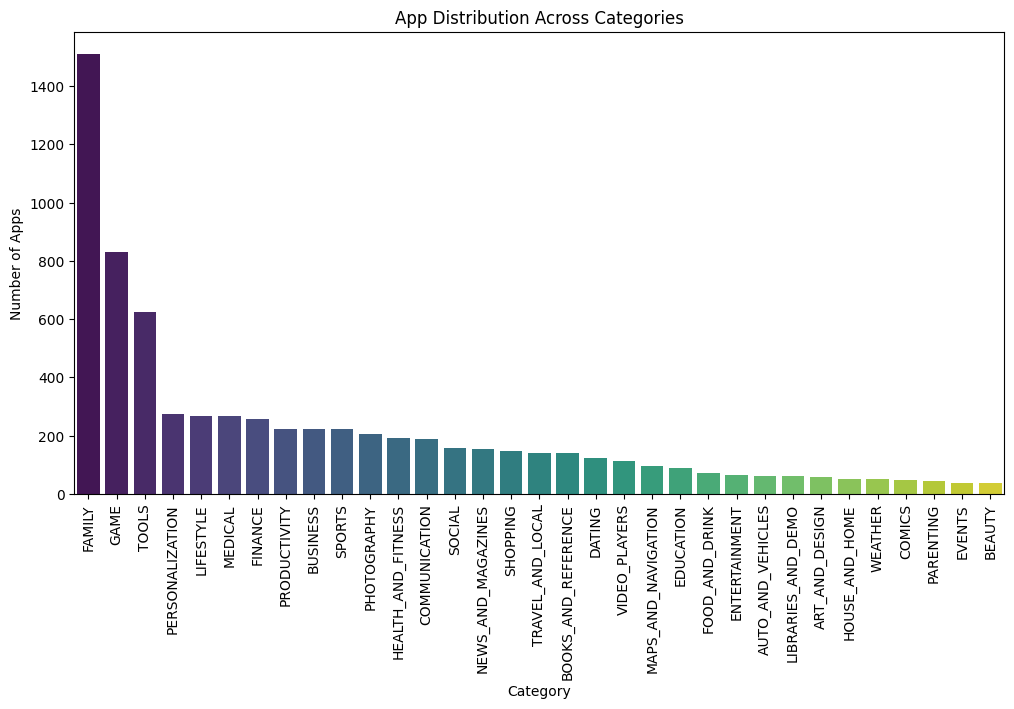

In [ ]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

#Metrics Analysis:
Examine app ratings, size, popularity, and pricing trends.

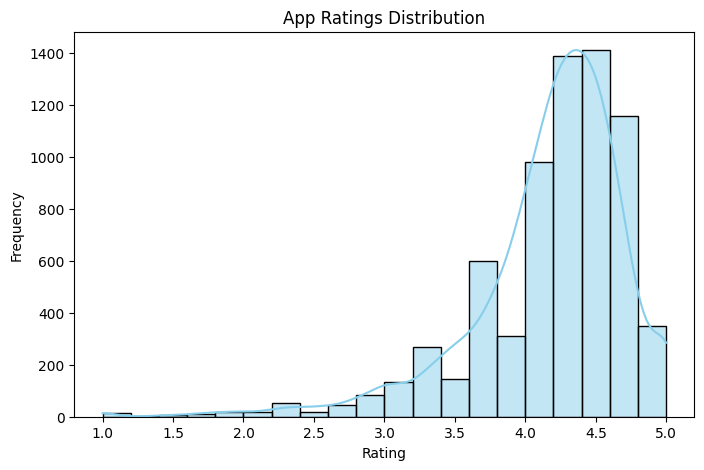

In [ ]:
# Metrics Analysis
# Example: App ratings distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Rating', bins=20, kde=True, color='skyblue')
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#sentiment Analysis
Sentiment Analysis:
Assess user sentiments through reviews.

In [ ]:
#Convert 'Reviews' column to strings
app = df['App']

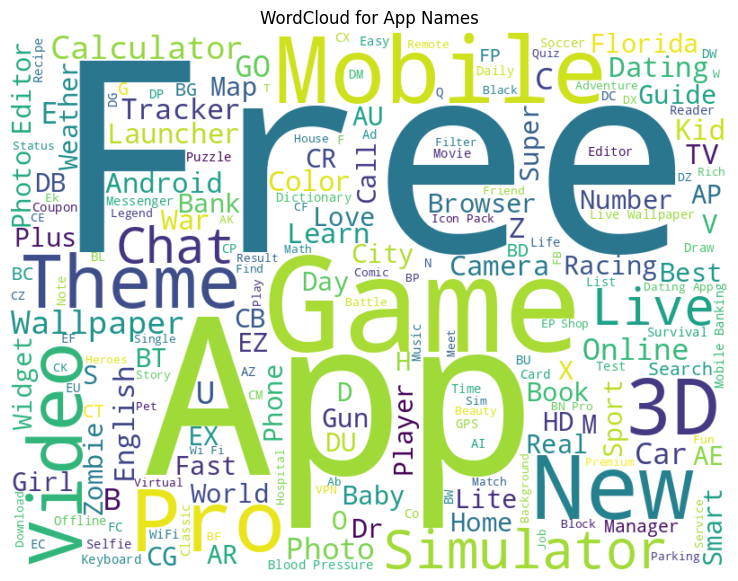

In [ ]:
# Generate word cloud for the 'App' column
text = " ".join(app.tolist())

wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for App Names")
plt.show()


In [ ]:
import plotly.express as px

# Example: Interactive scatter plot
fig = px.scatter(df, x='Genres', y='Reviews', color='Category',
                 size='Size', hover_data=['Content Rating'],
                 title='Interactive Scatter Plot')
fig.show()



# Insights of Visualization
1. The 'Category Exploration' plot shows that the 'Family' category has the highest number of apps, followed by 'Game' and 'Tools'.
2. In the 'App Ratings Distribution' plot, we can observe that most apps have ratings between 4 and 5, indicating that users generally rate apps positively.
3. The 'App Size Distribution' plot illustrates that the majority of apps have a size of less than 100 MB.
4. The 'Word Cloud of App Reviews' visually represents the most common words in app reviews, with 'great', 'good', and 'love' being among the most frequent words.